# Spheroid Analysis 

Notebook for the analysis of measured spheroid diameters (*Ferret Diameters*)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# 1) Import data 

inputFolder1 = "/Users/chririn/Box Sync/Spheroids/Results/V5/24h/ResultsSpheroidTest.csv"; 
inputFolder2 = "/Users/chririn/Box Sync/Spheroids/Results/V5/48h/ResultsSpheroidTest.csv"; 
inputFolder3 = "/Users/chririn/Box Sync/Spheroids/Results/V5/72h/ResultsSpheroidTest.csv"; 
inputFolder4 = "/Users/chririn/Box Sync/Spheroids/Results/V5/96h/ResultsSpheroidTest.csv";  

# 24h 
d = pd.read_csv(inputFolder1,index_col=False);
diameter = d['Diameter'].to_numpy();

# 48h 
d = pd.read_csv(inputFolder2,index_col=False);
diameter = np.append(diameter, d['Diameter'].to_numpy());

# 72h
d = pd.read_csv(inputFolder3,index_col=False);
diameter = np.append(diameter, d['Diameter'].to_numpy());

# 96h
d = pd.read_csv(inputFolder4,index_col=False);
diameter = np.append(diameter, d['Diameter'].to_numpy());

# Organize the data
diameter = diameter.reshape((4,6,16)); # [time x col x row]

# Replace 0s with NaNs
diameter[diameter==0]=['nan']; 


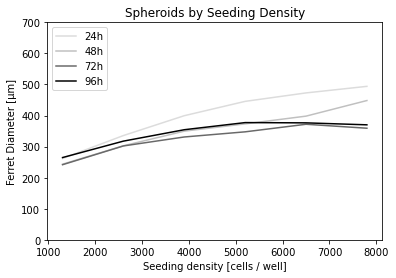

In [82]:
# 2.1) Plot diameter over Seeding Density

Seeding_Density = np.array([1300, 2600, 3900, 5200, 6500, 7800]);

plt.plot(Seeding_Density,np.nanmean(diameter[0,:,:], axis=1), 'gainsboro',label='24h');
plt.plot(Seeding_Density,np.nanmean(diameter[1,:,:], axis=1), 'silver',label='48h');
plt.plot(Seeding_Density,np.nanmean(diameter[2,:,:], axis=1), 'dimgrey',label='72h');
plt.plot(Seeding_Density,np.nanmean(diameter[3,:,:], axis=1), 'k-',label='96h');
plt.title('Spheroids by Seeding Density')
plt.xlabel('Seeding density [cells / well]'), plt.ylabel('Ferret Diameter [µm]')
plt.ylim(0, 700);
plt.legend()
plt.show()

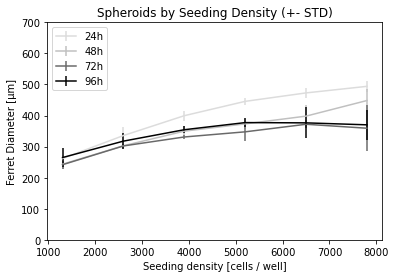

In [107]:
# 2.2 ) Plot diameter over Seeding Density + 1xSTD

Seeding_Density = np.array([1300, 2600, 3900, 5200, 6500, 7800]);

plt.errorbar(Seeding_Density,np.nanmean(diameter[0,:,:], axis=1), yerr=np.nanstd(diameter[0,:,:], axis=1), color='gainsboro',label='24h');
plt.errorbar(Seeding_Density,np.nanmean(diameter[1,:,:], axis=1), yerr=np.nanstd(diameter[1,:,:], axis=1), color='silver',label='48h');
plt.errorbar(Seeding_Density,np.nanmean(diameter[2,:,:], axis=1), yerr=np.nanstd(diameter[2,:,:], axis=1), color='dimgrey',label='72h');
plt.errorbar(Seeding_Density,np.nanmean(diameter[3,:,:], axis=1), yerr=np.nanstd(diameter[3,:,:], axis=1), color='k',label='96h');

plt.title('Spheroids by Seeding Density (+- STD)')
plt.xlabel('Seeding density [cells / well]'), plt.ylabel('Ferret Diameter [µm]')
plt.ylim(0, 700);
plt.legend()
plt.show()


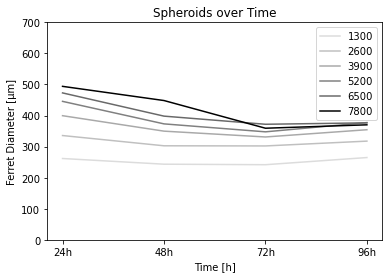

In [86]:
# 3.1) Plot diameter over time

Time = np.array(['24h', '48h', '72h', '96h']);

plt.plot(Time,np.nanmean(diameter[:,0,:], axis=1), 'gainsboro',label='1300');
plt.plot(Time,np.nanmean(diameter[:,1,:], axis=1), 'silver',label='2600');
plt.plot(Time,np.nanmean(diameter[:,2,:], axis=1), 'darkgray',label='3900');
plt.plot(Time,np.nanmean(diameter[:,3,:], axis=1), 'gray',label='5200');
plt.plot(Time,np.nanmean(diameter[:,4,:], axis=1), 'dimgray',label='6500');
plt.plot(Time,np.nanmean(diameter[:,5,:], axis=1), 'k',label='7800');

plt.title('Spheroids over Time')
plt.xlabel('Time [h]'), plt.ylabel('Ferret Diameter [µm]')
plt.ylim(0, 700);
plt.legend()
plt.show()

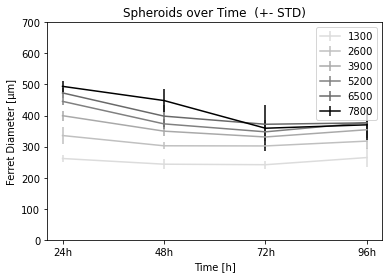

In [108]:
# 3.2) Plot diameter over time + 1xSTD

Time = np.array(['24h', '48h', '72h', '96h']);

plt.errorbar(Time,np.nanmean(diameter[:,0,:], axis=1), yerr=np.nanstd(diameter[:,0,:], axis=1), color='gainsboro',label='1300');
plt.errorbar(Time,np.nanmean(diameter[:,1,:], axis=1), yerr=np.nanstd(diameter[:,1,:], axis=1), color='silver',label='2600');
plt.errorbar(Time,np.nanmean(diameter[:,2,:], axis=1), yerr=np.nanstd(diameter[:,2,:], axis=1), color='darkgray',label='3900');
plt.errorbar(Time,np.nanmean(diameter[:,3,:], axis=1), yerr=np.nanstd(diameter[:,3,:], axis=1), color='gray',label='5200');
plt.errorbar(Time,np.nanmean(diameter[:,4,:], axis=1), yerr=np.nanstd(diameter[:,4,:], axis=1), color='dimgray',label='6500');
plt.errorbar(Time,np.nanmean(diameter[:,5,:], axis=1), yerr=np.nanstd(diameter[:,5,:], axis=1), color='k',label='7800');

plt.title('Spheroids over Time  (+- STD)')
plt.xlabel('Time [h]'), plt.ylabel('Ferret Diameter [µm]')
plt.ylim(0, 700);
plt.legend()
plt.show()